In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/raw_data_v2.csv')

In [60]:
df['genre'] = df['genre'].apply(lambda x: x.replace(' ', ''))
df['genre'] = df['genre'].apply(lambda x: x.replace('[', ''))
df['genre'] = df['genre'].apply(lambda x: x.replace(']', ''))
df['genre'] = df['genre'].apply(lambda x: x.replace('\'', ''))

In [61]:
genres = ['action', 'sci-fi', 'comedy', 'horror', 'drama', 'animation', 'mystery', 'crime', 'fantasy', 'thriller', 
          'romance', 'adventure', 'biography']
genre_counts = {i:sum(df['genre'].str.lower().str.contains(i)) for i in genres}

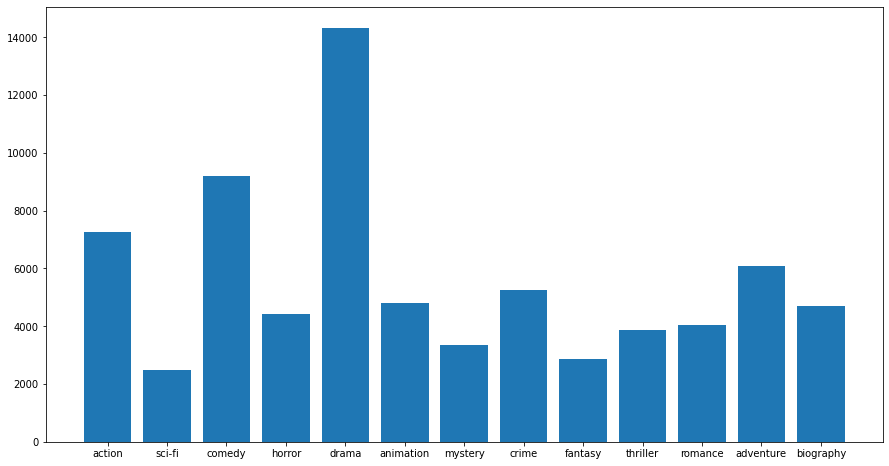

In [62]:
plt.figure(figsize=(15, 8))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.show()

In [63]:
# lower case
df['preprocessed_plot'] = df['plot'].str.lower()

In [64]:
# remove punctutation
import re
import string
df['preprocessed_plot'] = df['preprocessed_plot'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation+'»'), ' ' , x))
df['preprocessed_plot'][0]

'doctor strange teams up with a mysterious teenage girl from his dreams who can travel across multiverses  to battle multiple threats  including other universe versions of himself  which threaten to wipe out millions across the multiverse  they seek help from wanda the scarlet witch  wong and others '

In [65]:
# remove extra spaces
df['preprocessed_plot'] = df['preprocessed_plot'].apply(lambda x: re.sub(' +', ' ', x))
df['preprocessed_plot'][0]

'doctor strange teams up with a mysterious teenage girl from his dreams who can travel across multiverses to battle multiple threats including other universe versions of himself which threaten to wipe out millions across the multiverse they seek help from wanda the scarlet witch wong and others '

In [66]:
# remove digits
df['preprocessed_plot'] = df['preprocessed_plot'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [67]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['preprocessed_plot'] = df['preprocessed_plot'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
# remove "see full summary"
df['preprocessed_plot'] = df['preprocessed_plot'].str.replace('see full summary', '')

In [69]:
# lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['preprocessed_plot'] = df['preprocessed_plot'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in word_tokenize(x)]))
# df['plot'][0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
# count unique words

from collections import Counter

results = Counter()
df['preprocessed_plot'].apply(word_tokenize).apply(results.update)
print(results.most_common()[:10])

[('life', 4634), ('young', 3082), ('find', 2565), ('story', 2490), ('world', 2405), ('new', 2389), ('year', 2367), ('woman', 2270), ('family', 2252), ('one', 2198)]


In [71]:
# stats
unique_words_after_preprocessed = len(results)
all_words_after_preprocessed = sum(results.values())
sentence_count = df['plot'].apply(sent_tokenize).apply(len).sum()
all_words = df['plot'].apply(word_tokenize).apply(len).sum()

In [72]:
stats = pd.DataFrame(data={'all_words': [all_words], 'sentence_count': [sentence_count],
                      'all_words_after_preprocessed': [all_words_after_preprocessed],
                      'unique_words_after_preprocessed': [unique_words_after_preprocessed]})
stats

,all_words,sentence_count,all_words_after_preprocessed,unique_words_after_preprocessed
0,919703,42560,476183,34247


<BarContainer object of 20 artists>

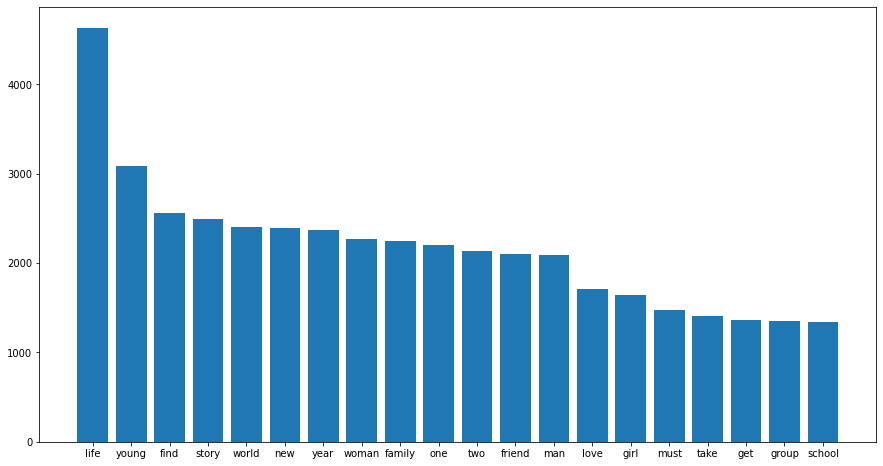

In [73]:
# plt.hist(results.most_common()[:5])
# results.most_common
plt.figure(figsize=(15, 8))
plt.bar((lambda x: [i[0] for i in x])(results.most_common()[:20]), (lambda x: [i[1] for i in x])(results.most_common()[:20]))

In [74]:
df.to_csv('../data/cleaned/cleaned_data.csv', index=False)